## Problem 6 \[8 points\]: Preparation of the general 2-Qubit pure state

Using Schmidt decomposition and its relation to the Singular value decomposition of matrices, suggest the
algorithm to prepare general 2-Qubit pure state
|ψ⟩ = a00|00⟩ + a01|01⟩ + a10|10⟩ + a11|11⟩

In the process of solving the following sources were used: lecture notes, Kaye "An Introduction to Quantum Computing"

In [1]:
import qiskit as qk

from qiskit import IBMQ,Aer
from qiskit.visualization import plot_bloch_multivector
from qiskit.quantum_info.operators import Operator
import numpy as np
from qiskit.tools.visualization import plot_histogram



qk.__qiskit_version__

{'qiskit-terra': '0.16.4',
 'qiskit-aer': '0.7.6',
 'qiskit-ignis': '0.5.2',
 'qiskit-ibmq-provider': '0.12.1',
 'qiskit-aqua': '0.8.2',
 'qiskit': '0.24.0'}

Let  $A = \bigl(\begin{smallmatrix}
a00&a01 \\ a10&a11
\end{smallmatrix} \bigr)$ and every two-Qubit state could be implemented as $\phi = B_{0}C_{01}U_{0}V_{1}$ with singular value decomposition $A = V BU^T$ 


**Case (a)**

$A=\frac{1}{\sqrt{2}}\bigl(\begin{smallmatrix}
1&0 \\ 0&\pm{1}
\end{smallmatrix}\bigr)$

In [2]:
A=np.array([[np.sqrt(0.5),0.0],[0.0,np.sqrt(0.5)]])
U,B,V = np.linalg.svd(A, full_matrices=True)
print (U)  # Identity gate
print(np.diag(B)) #Hadamard gate
print(V)  # Identity gate

[[1. 0.]
 [0. 1.]]
[[0.70710678 0.        ]
 [0.         0.70710678]]
[[1. 0.]
 [0. 1.]]


In [3]:
A=np.array([[np.sqrt(0.5),0.0],[0.0,-np.sqrt(0.5)]])
U,B,V = np.linalg.svd(A, full_matrices=True)
print (U)  # Identity gate
print(np.diag(B)) #Hadamard gate
print(V)  # Z gate

[[1. 0.]
 [0. 1.]]
[[0.70710678 0.        ]
 [0.         0.70710678]]
[[ 1.  0.]
 [-0. -1.]]


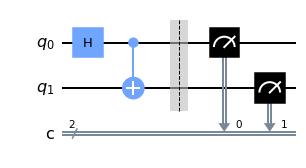

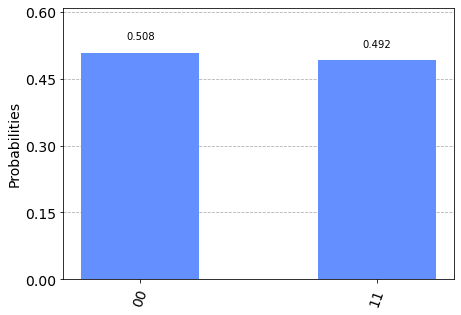

In [4]:

qreg_q = qk.QuantumRegister(2, 'q')
creg_c = qk.ClassicalRegister(2, 'c')
circuit = qk.QuantumCircuit(qreg_q, creg_c)

circuit.h( qreg_q[0])
circuit.cx(qreg_q[0], qreg_q[1])
circuit.barrier()

measureZ=qk.QuantumCircuit(qreg_q,creg_c)
measureZ.measure(qreg_q,creg_c)
testZ=circuit+measureZ

display(testZ.draw('mpl'))


backend=Aer.get_backend('qasm_simulator')
jobIBM=qk.execute([testZ],backend=backend,shots=1024)
res=jobIBM.result()

plot_histogram([res.get_counts(testZ)])

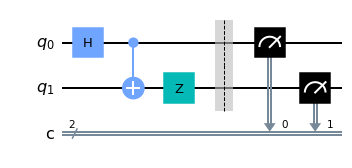

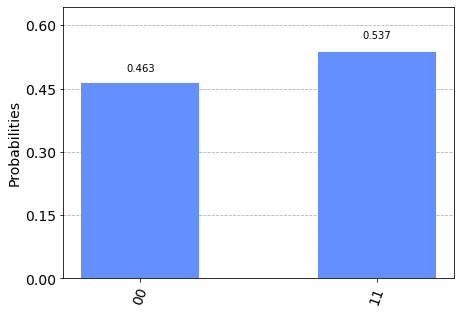

In [5]:
qreg_q = qk.QuantumRegister(2, 'q')
creg_c = qk.ClassicalRegister(2, 'c')
circuit = qk.QuantumCircuit(qreg_q, creg_c)

circuit.h( qreg_q[0])
circuit.cx(qreg_q[0], qreg_q[1])
circuit.z( qreg_q[1])
circuit.barrier()

measureZ=qk.QuantumCircuit(qreg_q,creg_c)
measureZ.measure(qreg_q,creg_c)
testZ=circuit+measureZ

display(testZ.draw('mpl'))


backend=Aer.get_backend('qasm_simulator')
jobIBM=qk.execute([testZ],backend=backend,shots=1024)
resultSimMulty=jobIBM.result()

plot_histogram([resultSimMulty.get_counts(testZ)])

**Case (b)**

$A=\frac{1}{\sqrt{2}}\bigl(\begin{smallmatrix}
0&1 \\ \pm{1}&0
\end{smallmatrix}\bigr)$

In [6]:
A=np.array([[0.0,np.sqrt(0.5)],[np.sqrt(0.5),0.0]])
U,B,V = np.linalg.svd(A, full_matrices=True)

print (U)  # X gate
print(np.diag(B)) #Hadamard gate
print(V)  # Identity gate

[[ 0. -1.]
 [-1.  0.]]
[[0.70710678 0.        ]
 [0.         0.70710678]]
[[-1. -0.]
 [-0. -1.]]


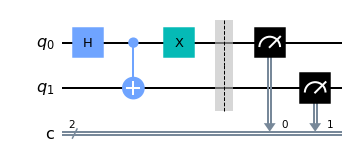

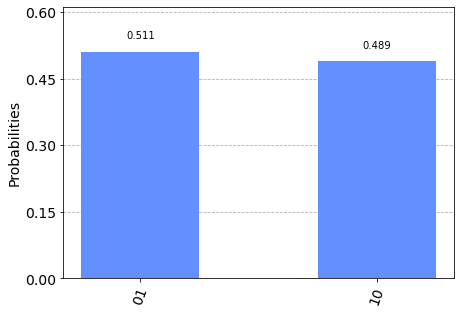

In [7]:
qreg_q = qk.QuantumRegister(2, 'q')
creg_c = qk.ClassicalRegister(2, 'c')
circuit = qk.QuantumCircuit(qreg_q, creg_c)

circuit.h( qreg_q[0])
circuit.cx(qreg_q[0], qreg_q[1])
circuit.x( qreg_q[0])
circuit.barrier()

measureZ=qk.QuantumCircuit(qreg_q,creg_c)
measureZ.measure(qreg_q,creg_c)
testZ=circuit+measureZ

display(testZ.draw('mpl'))


backend=Aer.get_backend('qasm_simulator')
jobIBM=qk.execute([testZ],backend=backend,shots=1024)
resultSimMulty=jobIBM.result()

plot_histogram([resultSimMulty.get_counts(testZ)])

In [8]:
A=np.array([[0.0,np.sqrt(0.5)],[-np.sqrt(0.5),0.0]])
U,B,V = np.linalg.svd(A, full_matrices=True)

print (U)  # X gate
print(np.diag(B)) #Hadamard gate
print(V)  # Z gate

[[0. 1.]
 [1. 0.]]
[[0.70710678 0.        ]
 [0.         0.70710678]]
[[-1. -0.]
 [ 0.  1.]]


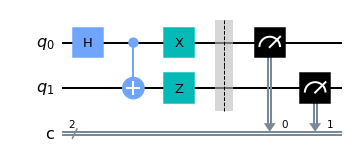

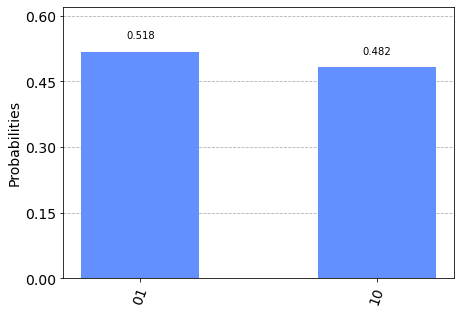

In [9]:
qreg_q = qk.QuantumRegister(2, 'q')
creg_c = qk.ClassicalRegister(2, 'c')
circuit = qk.QuantumCircuit(qreg_q, creg_c)

circuit.h( qreg_q[0])
circuit.cx(qreg_q[0], qreg_q[1])
circuit.x( qreg_q[0])
circuit.z( qreg_q[1])
circuit.barrier()

measureZ=qk.QuantumCircuit(qreg_q,creg_c)
measureZ.measure(qreg_q,creg_c)
testZ=circuit+measureZ

display(testZ.draw('mpl'))


backend=Aer.get_backend('qasm_simulator')
jobIBM=qk.execute([testZ],backend=backend,shots=1024)
resultSimMulty=jobIBM.result()

plot_histogram([resultSimMulty.get_counts(testZ)])

**Case (c)**

$A=\frac{1}{\sqrt{12}}\bigl(\begin{smallmatrix}
3&1 \\ 1&1
\end{smallmatrix}\bigr)$

In [10]:
A=np.array([[3/np.sqrt(12),1/np.sqrt(12)],[1/np.sqrt(12),1/np.sqrt(12)]])
U,B,V = np.linalg.svd(A)
print (U) 
print(np.diag(B)) # Rotation with Hadamard?
print(V) 
print('Eigenvalues of A', np.linalg.eigh(A)[1])


[[-0.92387953 -0.38268343]
 [-0.38268343  0.92387953]]
[[0.98559856 0.        ]
 [0.         0.16910198]]
[[-0.92387953 -0.38268343]
 [-0.38268343  0.92387953]]
Eigenvalues of A [[ 0.38268343 -0.92387953]
 [-0.92387953 -0.38268343]]


 $U=V=R_y(\theta_1),~\theta_1=arctan(0.24379)$
 
 $B=R_y(\theta_2),~\theta_2=arccos(-0.92387953)$
 


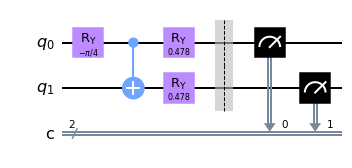

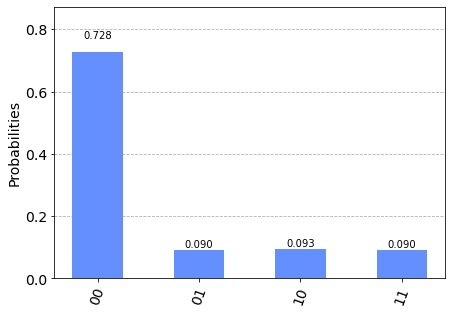

In [11]:
qreg_q = qk.QuantumRegister(2, 'q')
creg_c = qk.ClassicalRegister(2, 'c')
circuit = qk.QuantumCircuit(qreg_q, creg_c)


circuit.ry(-np.arccos(0.92387953)*2, qreg_q[0])

circuit.cx(qreg_q[0], qreg_q[1])

circuit.ry(np.arctan(0.24379)*2, qreg_q[0])
circuit.ry(np.arctan(0.24379)*2, qreg_q[1])
circuit.barrier()

measureZ=qk.QuantumCircuit(qreg_q,creg_c)
measureZ.measure(qreg_q,creg_c)
testZ=circuit+measureZ

display(testZ.draw('mpl'))


backend=Aer.get_backend('qasm_simulator')
jobIBM=qk.execute([testZ],backend=backend,shots=1024)
res=jobIBM.result()

plot_histogram([res.get_counts(testZ)])